<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/AMPDs_KNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [81]:
data = pd.read_csv('/content/drive/My Drive/Electricity_P.csv', delimiter=",")

In [82]:
data.shape

(1051200, 24)

In [83]:
data1 = data
data1['UNIX_TS'] = [datetime.fromtimestamp(waktu) for waktu in data['UNIX_TS']]

In [84]:
data1 = data1.set_index("UNIX_TS")

In [85]:
data1 = data
data1 = data.iloc[0:600000]

In [86]:
data1.shape

(600000, 24)

In [87]:
data1.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,HPE,OFE,UTE,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
0,2012-04-01 07:00:00,918,43,2,873,0,352,0,0,41,106,36,62,9,0,58,0,30,0,0,4,0,37,138
1,2012-04-01 07:01:00,913,43,0,870,0,354,0,0,35,107,37,61,9,0,58,0,30,0,0,4,0,37,138
2,2012-04-01 07:02:00,872,43,2,827,0,354,0,0,41,107,38,61,9,0,8,0,30,0,0,4,0,37,138
3,2012-04-01 07:03:00,872,43,2,827,0,354,0,0,40,106,37,61,9,0,7,0,30,0,0,4,0,37,142
4,2012-04-01 07:04:00,772,41,2,729,0,352,0,0,40,106,36,61,9,0,8,0,31,0,0,4,0,37,45


In [88]:
data.columns

Index(['UNIX_TS', 'WHE', 'RSE', 'GRE', 'MHE', 'B1E', 'BME', 'CWE', 'DWE',
       'EQE', 'FRE', 'HPE', 'OFE', 'UTE', 'WOE', 'B2E', 'CDE', 'DNE', 'EBE',
       'FGE', 'HTE', 'OUE', 'TVE', 'UNE'],
      dtype='object')

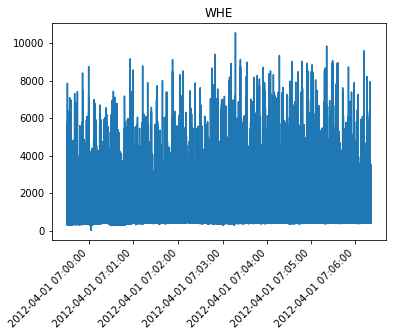

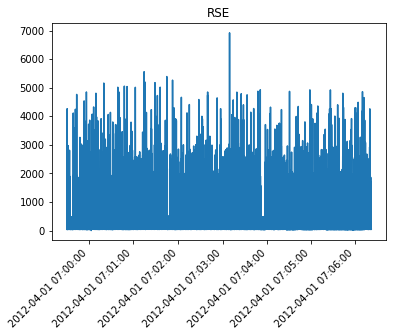

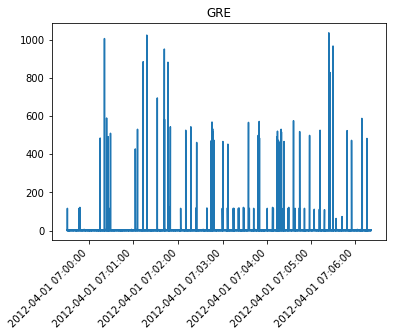

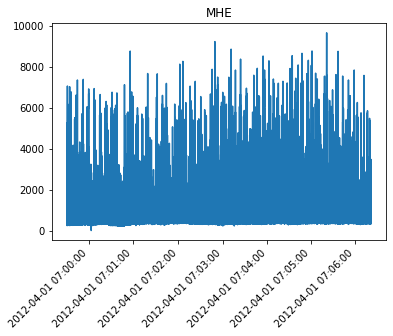

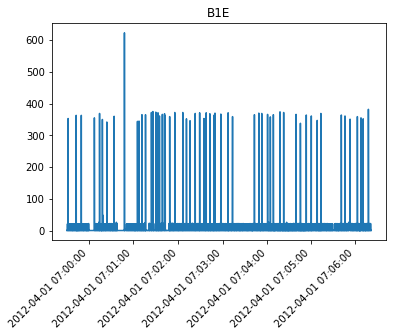

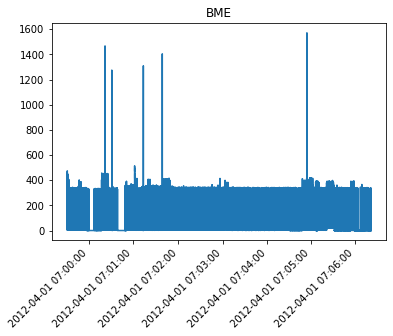

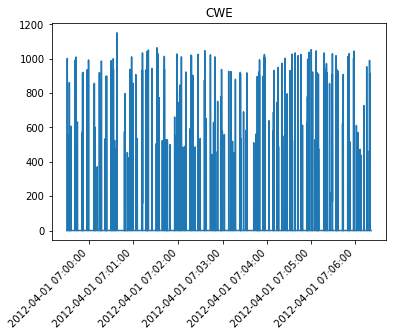

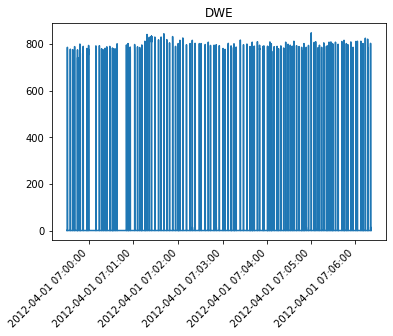

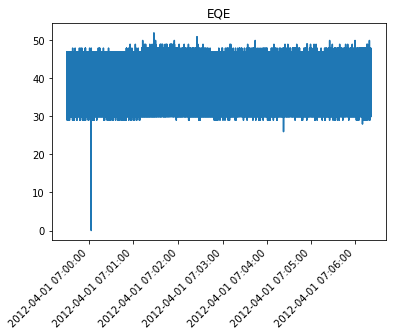

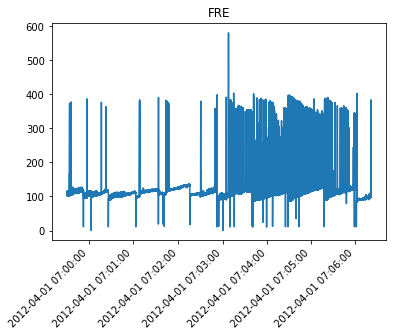

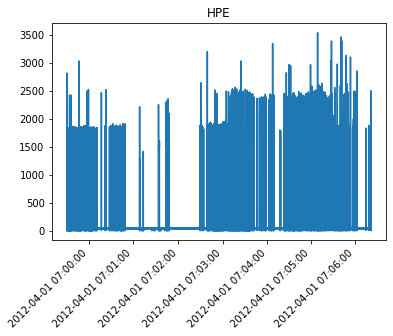

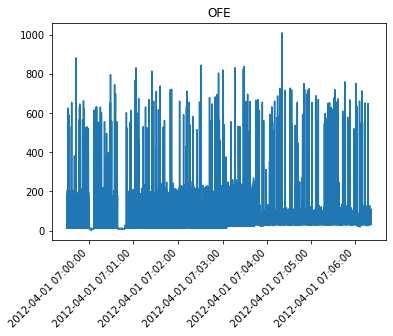

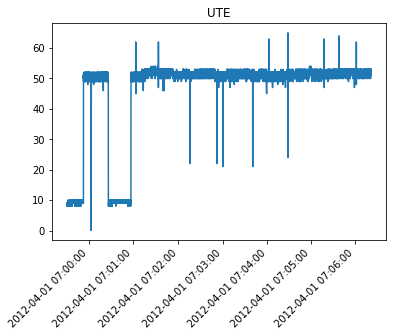

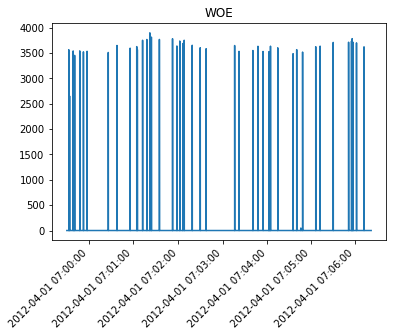

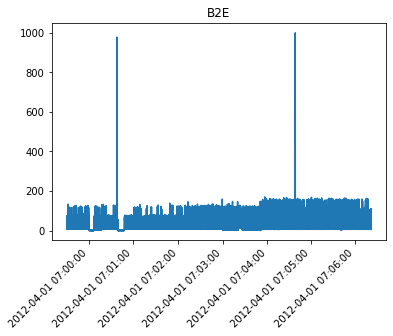

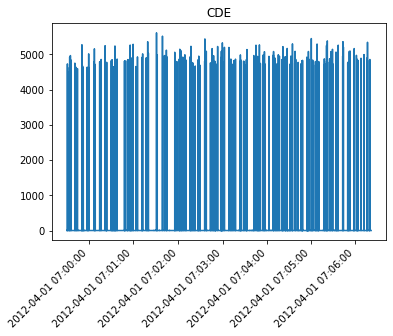

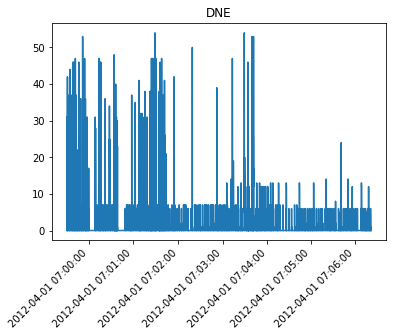

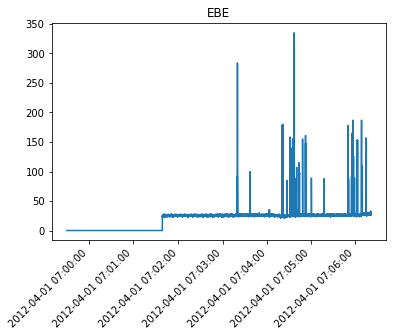

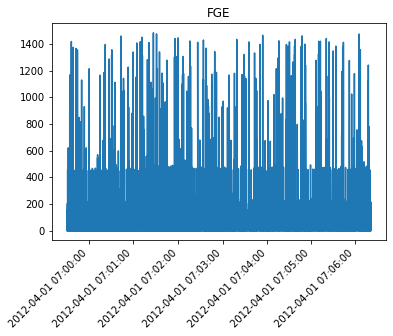

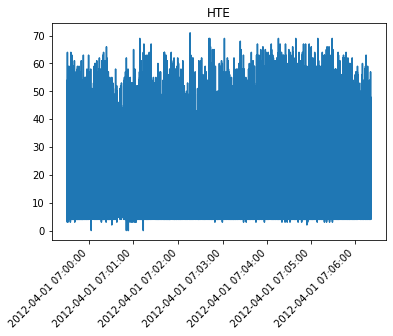

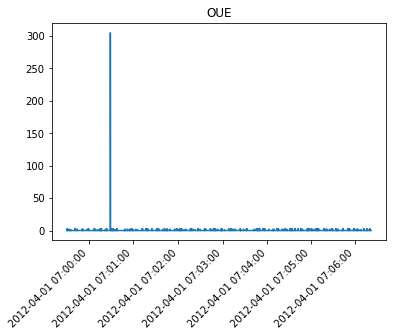

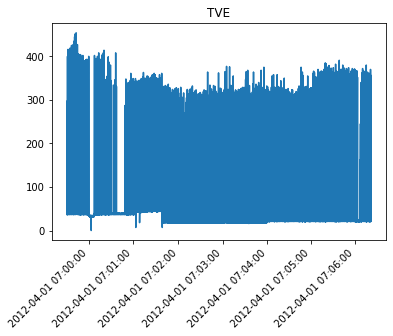

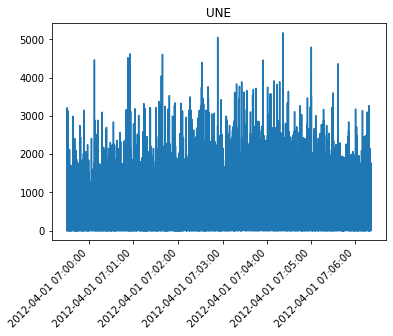

In [89]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.plot(data1['UNIX_TS'],data1[i])
  axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
  plt.show()

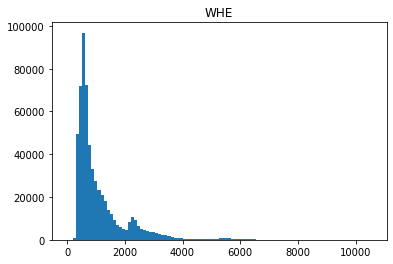

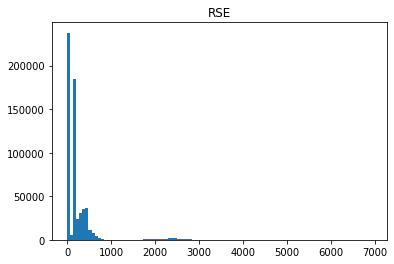

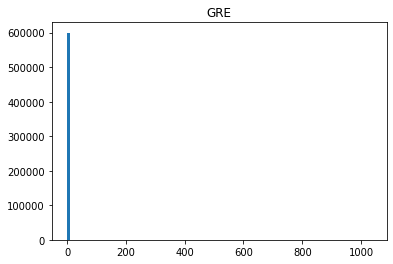

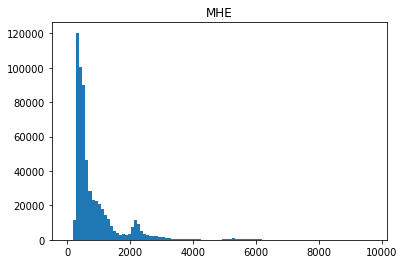

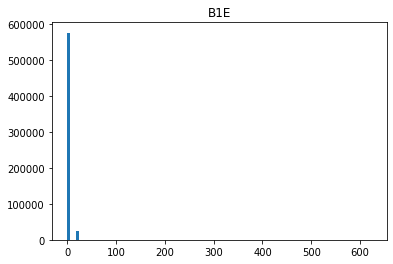

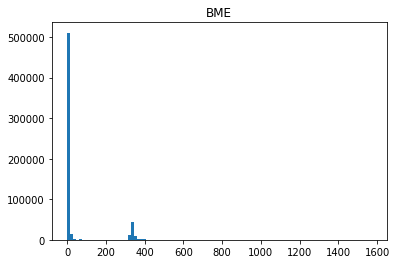

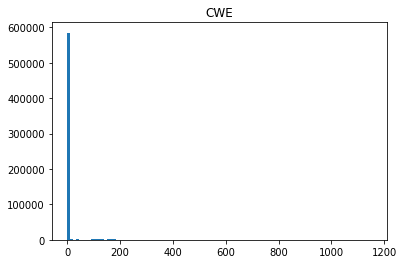

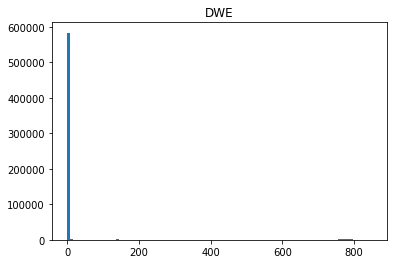

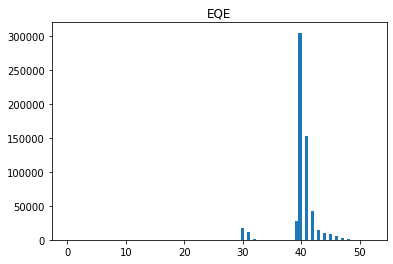

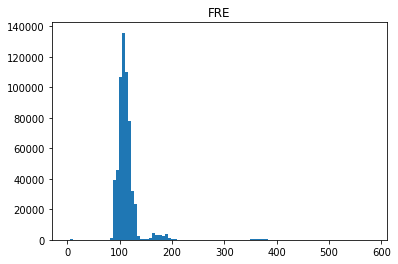

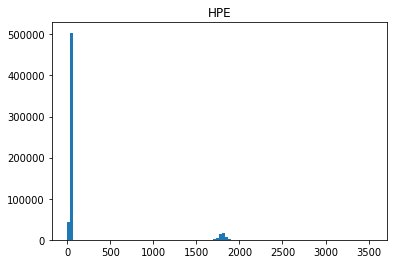

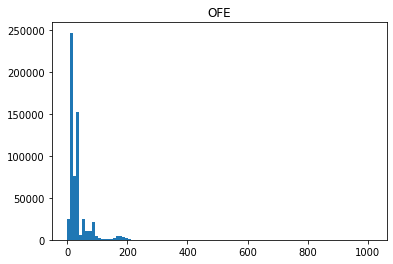

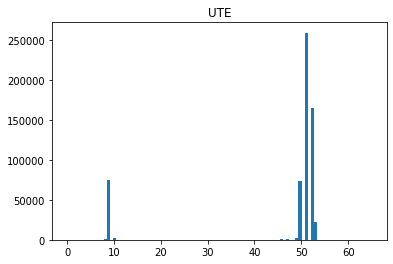

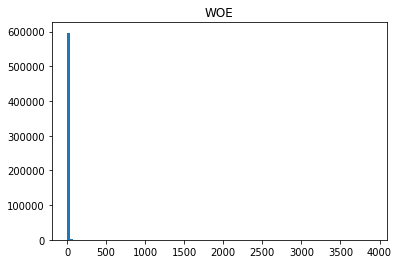

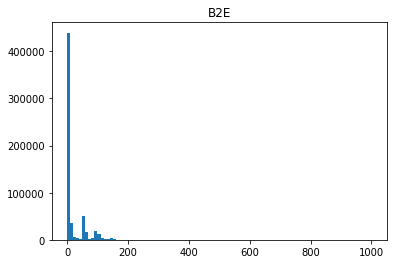

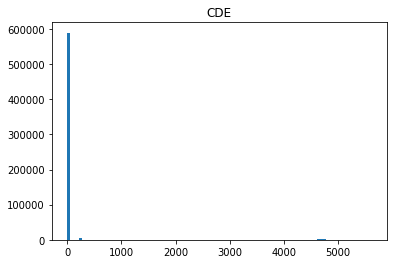

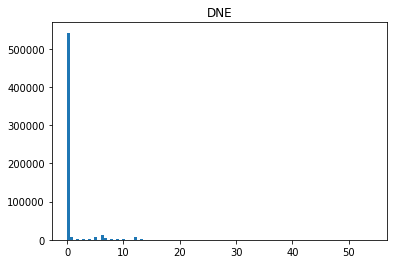

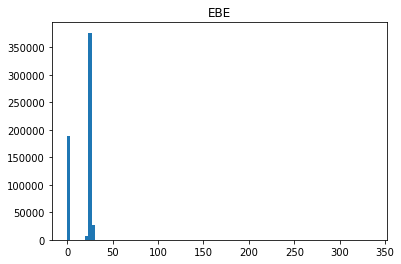

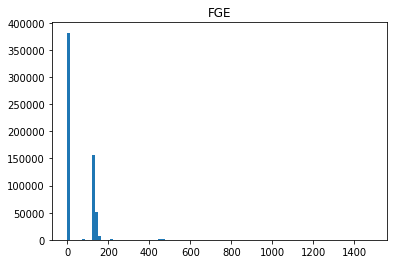

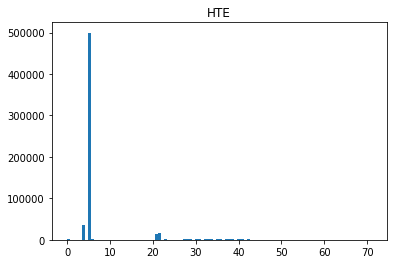

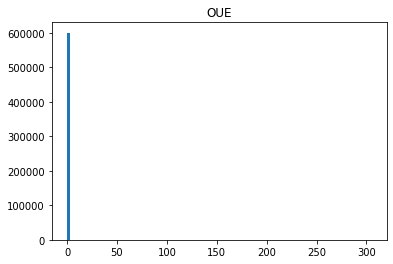

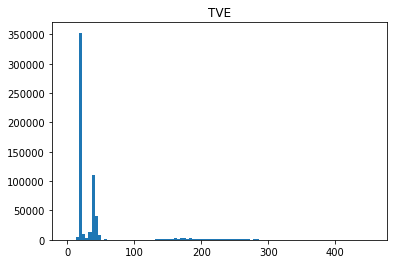

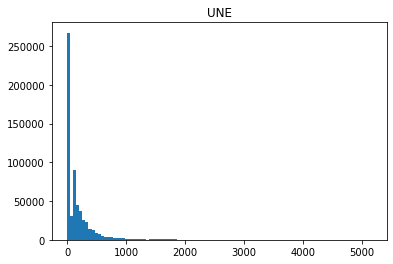

In [90]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.hist(data1[i], bins=100, range=[0,data1[i].max()])
  # axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.show()

In [91]:
output_label = ["CWE", "DWE", "WOE", "CDE", "FGE", "HPE"]

In [92]:
training_data = data1.iloc[0:161280]
X_train = training_data[output_label].to_numpy().sum(axis=1)
X_train = pd.DataFrame(X_train, index=training_data["UNIX_TS"])

In [93]:
clustertrain = {}
centroid = np.array([0,100]).reshape(-1,1)
for i in output_label:
  kmeans = KMeans(n_clusters=2,init=centroid).fit(training_data[i].to_numpy().reshape(-1, 1))
  clustertrain[i] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: perform

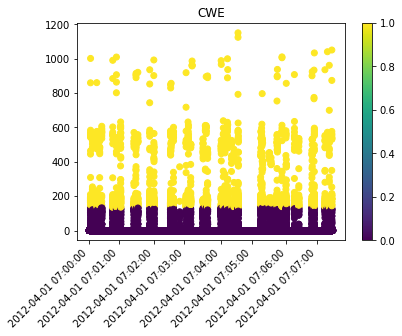

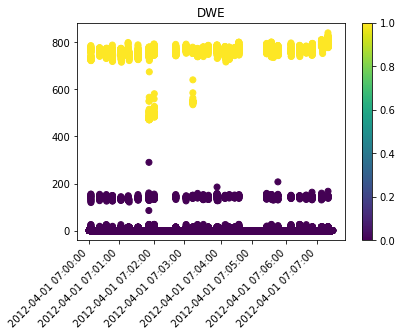

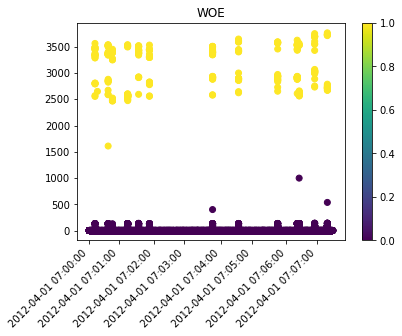

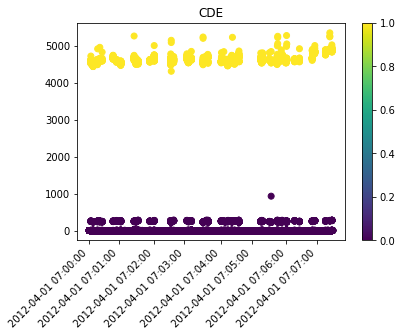

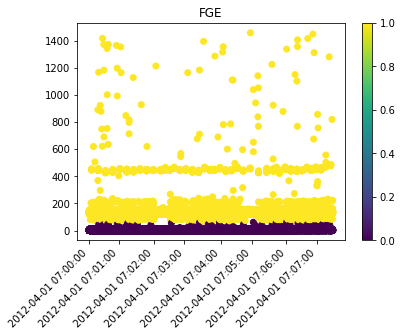

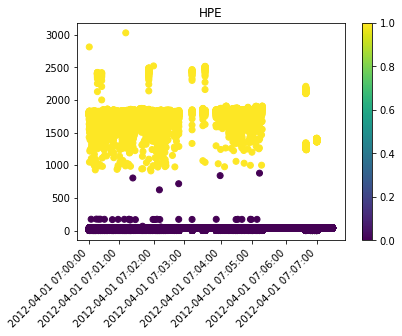

In [94]:
for i in output_label:  
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.scatter(training_data["UNIX_TS"],training_data[i],c=clustertrain[i])
  axes.set_xticklabels(training_data['UNIX_TS'], rotation = 45, ha="right")
  plt.colorbar()
  plt.show()

In [95]:
clustertrain["UNIX_TS"] = training_data["UNIX_TS"]
clustertrainpd = pd.DataFrame.from_dict(clustertrain)
clustertrainpd = clustertrainpd.set_index("UNIX_TS")
y_train = clustertrainpd

In [96]:
testing_data1 = data1.iloc[161280:162720] #1minggu
X_test = testing_data1[output_label].to_numpy().sum(axis=1)
X_test = pd.DataFrame(X_test, index=testing_data1["UNIX_TS"])

In [97]:
clustertest = {}
centroid = np.array([0,100]).reshape(-1,1)
for i in output_label:
  kmeans = KMeans(n_clusters=2,init=centroid).fit(testing_data1[i].to_numpy().reshape(-1, 1))
  clustertest[i] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position pas

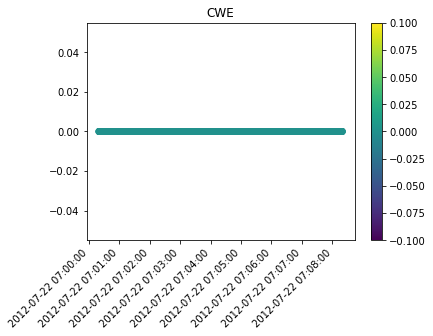

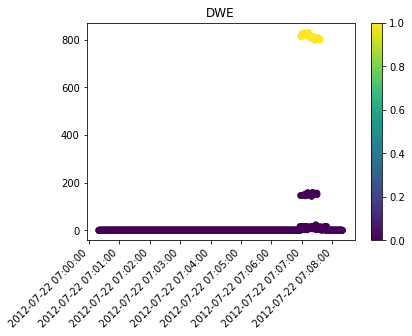

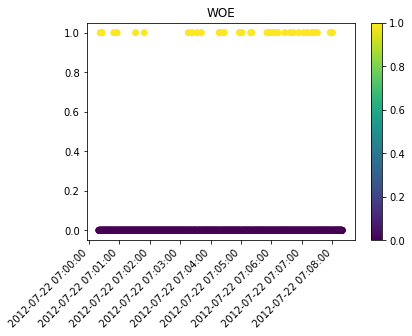

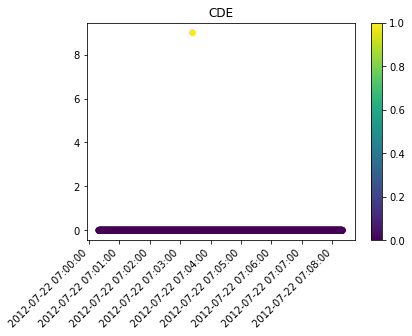

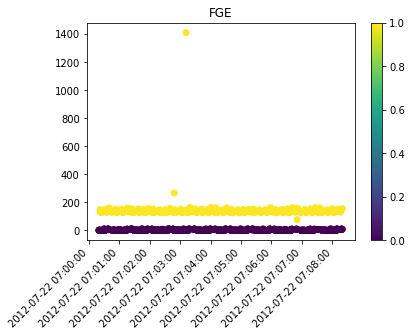

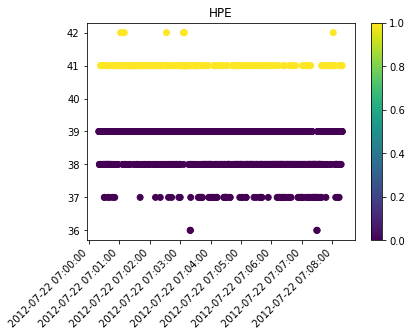

In [98]:
for i in output_label:  
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.scatter(testing_data1["UNIX_TS"],testing_data1[i],c=clustertest[i])
  axes.set_xticklabels(testing_data1['UNIX_TS'], rotation = 45, ha="right")
  plt.colorbar()
  plt.show()

In [99]:
clustertest["UNIX_TS"] = testing_data1["UNIX_TS"]
clustertestpd = pd.DataFrame.from_dict(clustertest)
clustertestpd = clustertestpd.set_index("UNIX_TS")
y_test = clustertestpd

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(161280, 1)
(1440, 1)
(161280, 6)
(1440, 6)


In [101]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
akurasi = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  predict = knn.predict(X_test)
  akurasi.append(accuracy_score(y_test,predict))

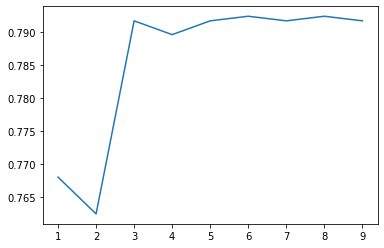

In [103]:
plt.plot(range(1,10),akurasi)
plt.show()

In [104]:
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski')

In [105]:
knn.fit(X_train,y_train)
predict = knn.predict(X_test)

In [106]:
print("Nilai Akurasi =",accuracy_score(y_test, predict))
print("Jumlah Data Prediksi Yang benar =",accuracy_score(y_test, predict, normalize=False))
print("Jumlah Data Prediksi =",y_test.shape[0])

Nilai Akurasi = 0.7916666666666666
Jumlah Data Prediksi Yang benar = 1140
Jumlah Data Prediksi = 1440


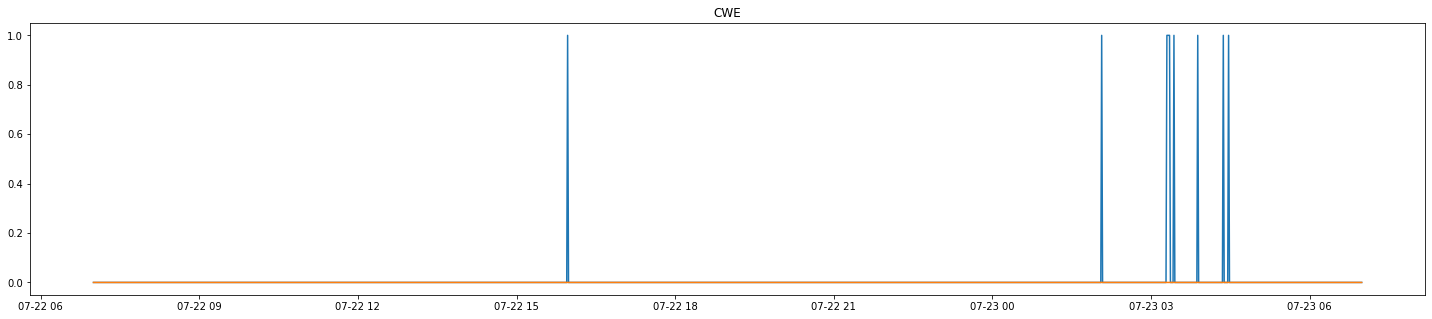

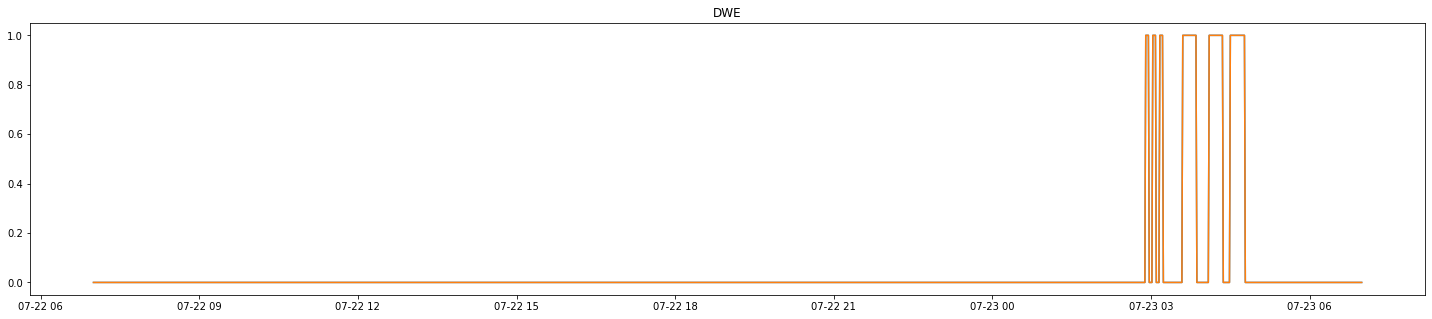

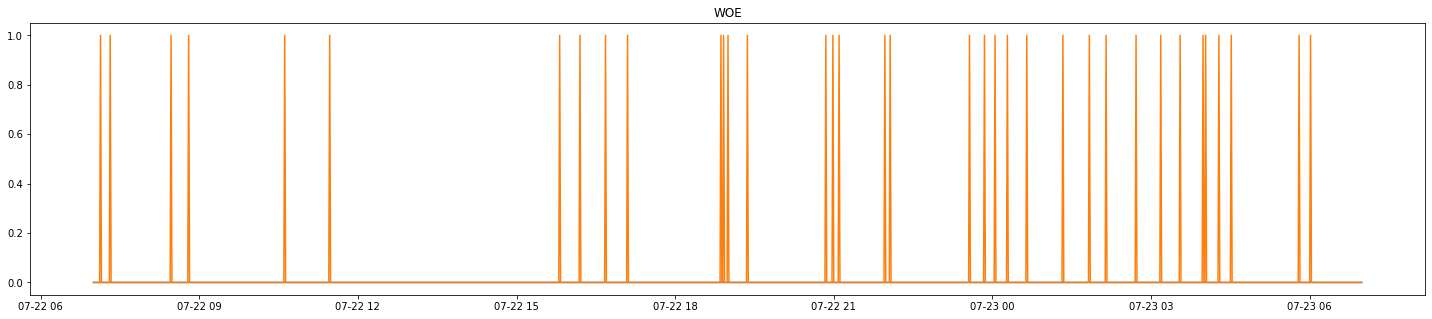

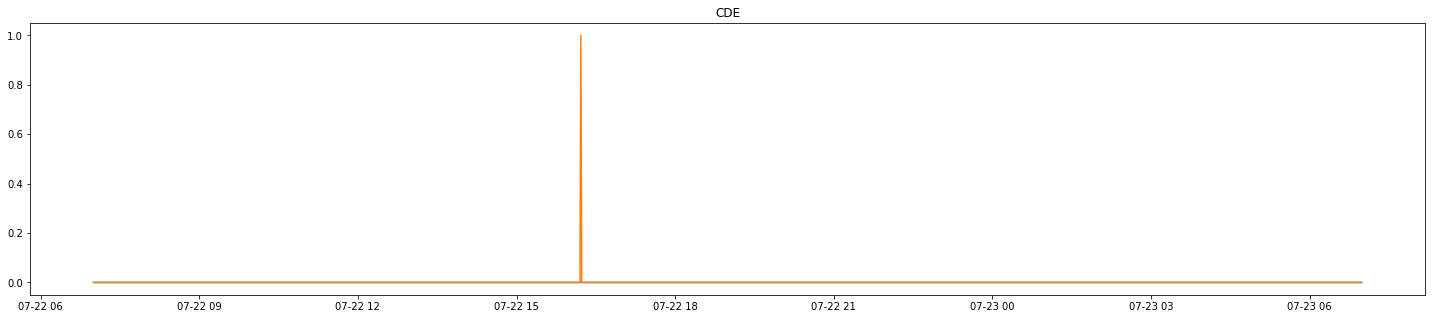

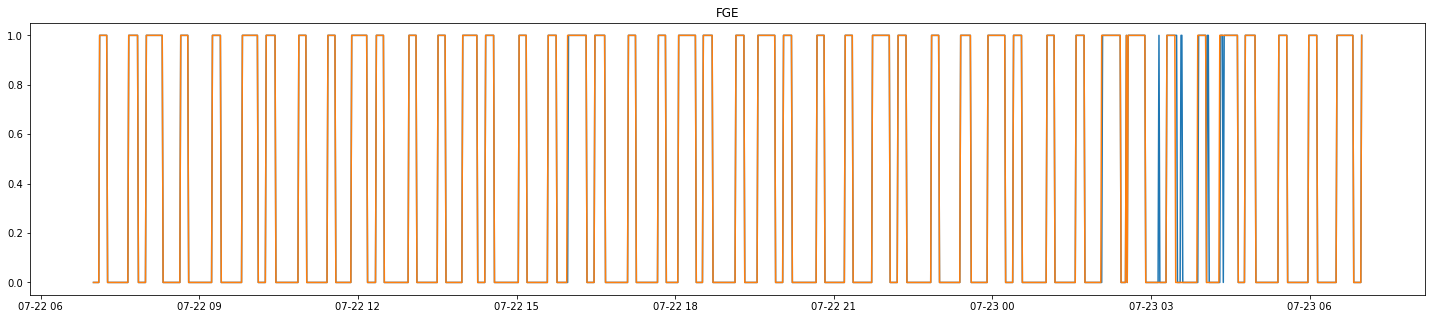

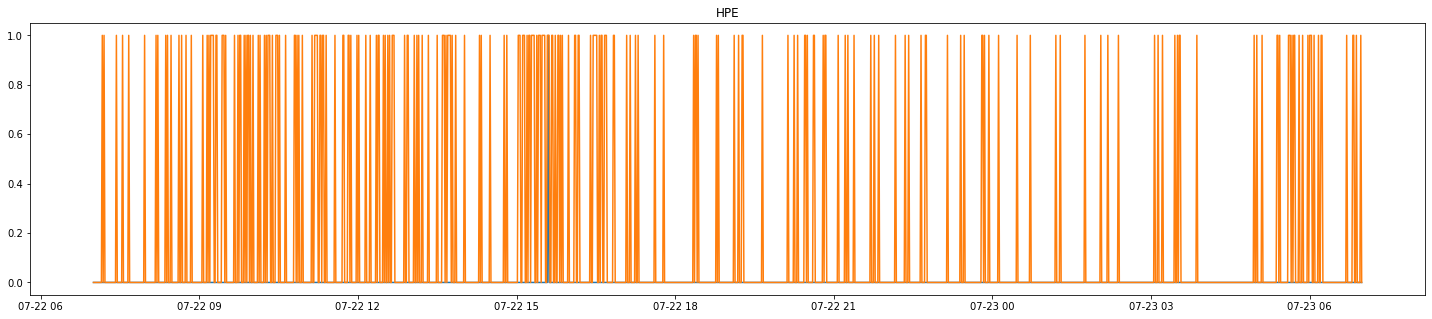

In [107]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(y_test.index,predict[:,i])
  plt.plot(y_test.index,y_test[e])
  plt.show()

In [108]:
for i,e in enumerate(output_label):
  print(e,'=',accuracy_score(y_test[e],predict[:,i]))

CWE = 0.9930555555555556
DWE = 1.0
WOE = 0.975
CDE = 0.9993055555555556
FGE = 0.9916666666666667
HPE = 0.825
